이번 챕터에서는 선형 회귀 이론에 대해서 이해하고, 파이토치(PyTorch)를 이용하여 선형 회귀 모델을 만들어보겠습니다.

+ **데이터에 대한 이해(Data Definition)**  
    학습할 데이터에 대해서 알아봅니다.

+ **가설(Hypothesis) 수립**  
    가설을 수립하는 방법에 대해서 알아봅니다.

+ **손실 계산하기(Compute loss)**  
    학습 데이터를 이용해서 연속적으로 모델을 개선시키는데 이 때 손실(loss)를 이용합니다.

+ **경사 하강법(Gradient Descent)**  
    학습을 위한 핵심 알고리즘인 경사 하강법(Gradient Descent)에 대해서 이해합니다.

# 1. 데이터에 대한 이해(Data Definition)

---

이번 챕터에서 선형 회귀를 위해 사용할 예제는 공부한 시간과 점수에 대한 상관관계입니다.

## 1) 훈련 데이터셋과 테스트 데이터셋

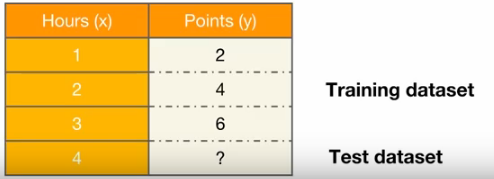

어떤 학생이 1시간 공부를 했더니 2점, 다른 학생이 2시간 공부를 했더니 4점, 또 다른 학생이 3시간을 공부했더니 6점을 맞았습니다. **그렇다면, 내가 4시간을 공부한다면 몇 점을 맞을 수 있을까요?**

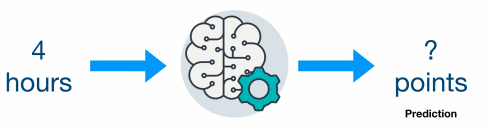

이 질문에 대답하기 위해서 1시간, 2시간, 3시간을 공부했을 때 각각 2점, 4점, 6점이 나왔다는 앞서 나온 정보를 이용해야 합니다. 이때 예측을 위해 사용하는 데이터를 훈련 데이터셋(training dataset)이라고 합니다. 학습이 끝난 후, 이 모델이 얼마나 잘 작동하는지 판별하는 데이터셋을 테스트 데이터셋(test dataset)이라고 합니다.

## 2) 훈련 데이터셋의 구성

앞서 텐서에 대해서 배웠는데, 모델을 학습시키기 위한 데이터는 파이토치의 텐서의 형태(torch.tensor)를 가지고 있어야 합니다. 그리고 입력과 출력을 각기 다른 텐서에 저장할 필요가 있습니다. 이때 보편적으로 입력은 x, 출력은 y를 사용하여 표기합니다.

여기서 x_train은 공부한 시간, y_train은 그에 맵핑되는 점수를 의미합니다.

In [4]:
import torch
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

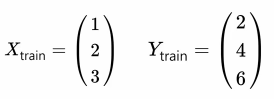

이제 모델의 가설을 세워보겠습니다.

# 2. 가설(Hypothesis) 수립

---

머신 러닝에서 식을 세울때 이 식을 가설(Hypothesis)라고 합니다. 보통 머신 러닝에서 가설은 임의로 추측해서 세워보는 식일수도 있고, 경험적으로 알고 있는 식일 수도 있습니다. 그리고 맞는 가설이 아니라고 판단되면 계속 수정해나가게 되는 식이기도 합니다.

선형 회귀의 가설은 이미 널리 알려져있으므로 고민할 필요가 없습니다. 선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일입니다. 이때 선형 회귀의 가설(직선의 방정식)은 아래와 같은 형식을 가집니다.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>=</mo>
  <mi>W</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
</math>

가설의 H를 따서 y대신 다음과 같이 식을 표현하기도 합니다.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>W</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
</math>

이때 x와 곱해지는 W를 가중치(Weight)라고 하며, b를 편향(bias)이라고 합니다.

+ W와 b는 중학교 수학 과정인 직선의 방정식에서 기울기와 y절편에 해당됩니다.

+ 직선의 방정식 링크 : https://mathbang.net/443

# 3. 비용 함수(Cost function)에 대한 이해

---

앞으로 딥 러닝을 학습하면서 인터넷에서 이런 용어들을 본다면, 전부 같은 용어로 생각하면 되겠습니다.

**비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)**

특히 비용 함수와 손실 함수란 용어는 기억해두는 것이 좋습니다.

비용 함수에 대해서 이해하기 위해서 여기서만 잠깐 새로운 예제를 사용해보겠습니다.
어떤 4개의 훈련 데이터가 있고, 이를 2차원 그래프에 4개의 점으로 표현한 상태라고 하겠습니다.

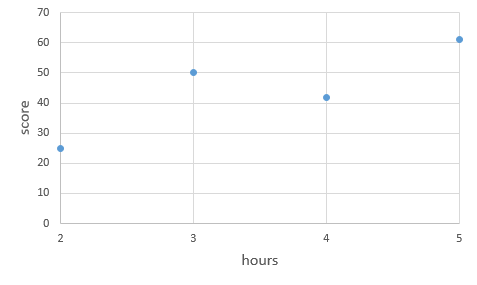

지금 목표는 4개의 점을 가장 잘 표현하는 직선을 그리는 일입니다. 임의로 3개의 직선을 그려보겠습니다.

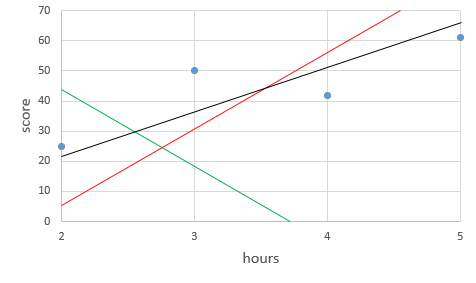


위의 그림은 서로 다른 W와 b의 값에 따라서 천차만별로 그려진 3개의 직선의 모습을 보여줍니다. 이 3개의 직선 중에서 4개의 점을 가장 잘 반영한 직선은 어떤 직선인가요? 검은색 직선이라고 말하는 사람도 있을 것이고, 잘 모르겠다고 말하는 사람도 있을 것입니다. 검은색 직선이라고 말하는 사람은 검은색 직선이 가장 4개의 점에 가깝게 지나가는 느낌을 받고 있기 때문입니다.

하지만 수학에서 느낌이라는 표현을 사용하는 것은 아무런 의미도 없습니다. 어떤 직선이 가장 적절한 직선인지를 수학적인 근거를 대서 표현할 수 있어야 합니다. 그래서 오차(error)라는 개념을 도입하겠습니다.

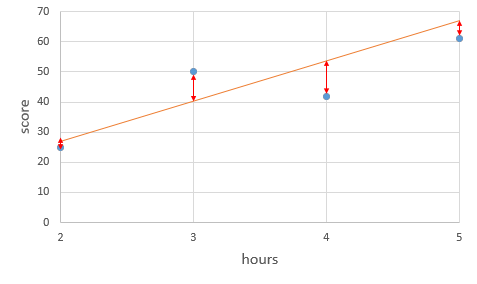

위 그림은 임의로 그려진 주황색 선에 대해서 각 실제값(4개의 점)과 직선의 예측값(동일한 x값에서의 직선의 y값)에 대한 값의 차이를 빨간색 화살표 ↕로 표현한 것입니다. 각 실제값과 각 예측값과의 차이고, 이를 각 실제값에서의 오차라고 말할 수 있습니다. 이 직선의 예측값들과 실제값들과의 총 오차(total error)는 어떻게 구할까요? 직관적으로 생각하기에 모든 오차를 다 더하면 될 것 같습니다. 각 오차를 전부 더해봅시다.

위 주황색 직선의 식은 y = 13x + 1이며, 각 오차는 다음과 같습니다.

| hours | 실제값 | 예측값 | 오차 |
|:-----:|:------:|:------:|:----:|
|2      |25      |27      |-2    |
|3      |50      |40      |10    |
|4      |42      |53      |-11   |
|5      |61      |66      |-5    |

각 오차를 계산해봤습니다. 그런데 수식적으로 단순히 '오차 = 실제값 - 예측값'으로 정의하면 오차값이 음수가 나오는 경우가 생깁니다. 예를 들어 위의 표에서만 봐도 오차가 음수인 경우가 3번이나 됩니다.

이 경우, 오차를 모두 더하면 덧셈 과정에서 오차값이 +가 되었다가 -되었다가 하므로 제대로 된 오차의 크기를 측정할 수 없습니다. 그래서 오차를 그냥 전부 더하는 것이 아니라, 각 오차들을 제곱해준 뒤에 전부 더하겠습니다.

이를 수식으로 표현하면 아래와 같습니다. 단, 여기서 
은 갖고 있는 데이터의 개수를 의미합니다.

$$
\sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2 = (-2)^{2} + 10^{2} + (-9)^{2} + (-5)^{2} = 210
$$

이때 데이터의 개수인 $$n$$으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 평균 제곱 오차(Mean Squared Error, MSE)라고 합니다. 수식은 아래와 같습니다.

$$
\frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2 = 210 / 4 = 52.5
$$
이를 실제로 계산하면 52.5가 됩니다. 이는 $y = 13x + 1$ 의 예측값과 실제값의 평균 제곱 오차의 값이 52.5임을 의미합니다.

평균 제곱 오차는 이번 회귀 문제에서 적절한 $W$와 $b$를 찾기 위해서 최적화된 식입니다. 그 이유는 평균 제곱 오차의 값을 최소값으로 만드는 $W$와 $b$를 찾아내는 것이 가장 훈련 데이터를 잘 반영한 직선을 찾아내는 일이기 때문입니다.

평균 제곱 오차를 $W$와 $b$에 의한 비용 함수(Cost function)로 재정의해보면 다음과 같습니다.

$$
cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2
$$

다시 정리하겠습니다. $Cost(W, b)$를 최소가 되게 만드는 $W$와 $b$를 구하면 훈련 데이터를 가장 잘 나타내는 직선을 구할 수 있습니다.

# 4. 옵티마이저 - 경사 하강법(Gradient Descent)

---

이제 앞서 정의한 비용 함수(Cost Function)의 값을 최소로 하는 $W$와 $b$를 찾는 방법에 대해서 배울 차례입니다. 이때 사용되는 것이 **옵티마이저(Optimizer)** 알고리즘입니다. **최적화 알고리즘**이라고도 부릅니다. 그리고 이 옵티마이저 알고리즘을 통해 적절한 
$W$와 $b$를 찾아내는 과정을 머신 러닝에서 학습(training)이라고 부릅니다. 여기서는 가장 기본적인 옵티마이저 알고리즘인 경사 하강법(Gradient Descent)에 대해서 배웁니다.

이번 설명에서 편향 $b$는 고려하지 않겠습니다. 즉, $b$가 0이라고 가정한 $y = Wx$와 같은 식을 기준으로 설명합니다.

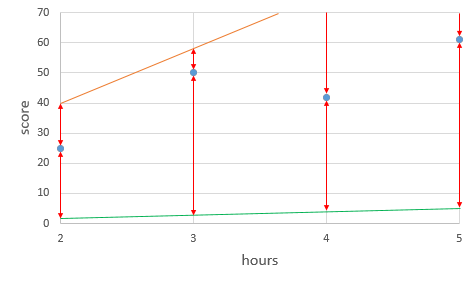

가중치 $W$가 직선의 방정식에서는 기울기였음을 기억합시다. 이제 $W$를 기울기라고 명명하고 설명합니다.

위의 그림에서 주황색선은 기울기 $W$가 20일 때, 초록색선은 기울기 $W$가 1일 때를 보여줍니다. 다시 말하면 각각 $y = 20x$, $y = x$에 해당되는 직선입니다. ↕는 각 점에서의 실제값과 두 직선의 예측값과의 오차를 보여줍니다. 이는 앞서 예측에 사용했던 $y = 13x + 1$ 직선보다 확연히 큰 오차값들입니다. 즉, 기울기가 지나치게 크면 실제값과 예측값의 오차가 커지고, 기울기가 지나치게 작아도 실제값과 예측값의 오차가 커집니다. 사실 $b$ 또한 마찬가지인데 $b$가 지나치게 크거나 작으면 오차가 커집니다.

설명의 편의를 위해 편향 $b$가 없이 단순히 가중치 $W$만을 사용한 $H(x) = Wx$라는 가설을 가지고, 경사 하강법을 설명하겠습니다. 비용 함수의 값 $cost(W)$는 cost라고 줄여서 표현해보겠습니다. 이에 따라 
$W$와 cost의 관계를 그래프로 표현하면 다음과 같습니다.

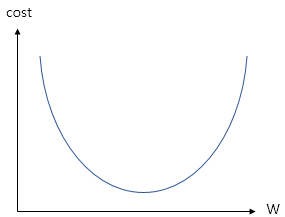

기울기 $W$가 무한대로 커지면 커질 수록 cost의 값 또한 무한대로 커지고, 반대로 기울기 $W$가 무한대로 작아져도 cost의 값은 무한대로 커집니다. 위의 그래프에서 cost가 가장 작을 때는 맨 아래의 볼록한 부분입니다. 기계가 해야할 일은 cost가 가장 최소값을 가지게 하는 $W$를 찾는 일이므로, 맨 아래의 볼록한 부분의 $W$의 값을 찾아야 합니다.

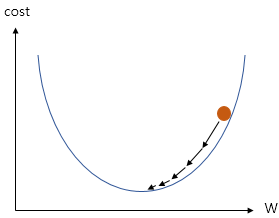

기계는 임의의 초기값 $W$값을 정한 뒤에, 맨 아래의 볼록한 부분을 향해 점차 $W$의 값을 수정해나갑니다. 위의 그림은 $W$값이 점차 수정되는 과정을 보여줍니다. 그리고 이를 가능하게 하는 것이 경사 하강법(Gradient Descent)입니다. 이를 이해하기 위해서는 고등학교 수학 과정인 미분을 이해해야 합니다. 경사 하강법은 미분을 배우게 되면 가장 처음 배우게 되는 개념인 한 점에서의 순간 변화율 또는 접선에서의 기울기의 개념을 사용합니다.

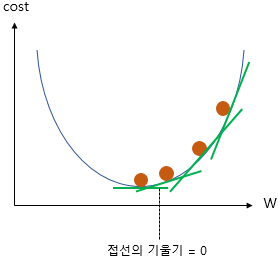

위의 그림에서 초록색 선은 $W$가 임의의 값을 가지게 되는 네 가지의 경우에 대해서, 그래프 상으로 접선의 기울기를 보여줍니다. 주목할 것은 맨 아래의 볼록한 부분으로 갈수록 접선의 기울기가 점차 작아진다는 점입니다. 그리고 맨 아래의 볼록한 부분에서는 결국 접선의 기울기가 0이 됩니다. 그래프 상으로는 초록색 화살표가 수평이 되는 지점입니다.

즉, cost가 최소화가 되는 지점은 접선의 기울기가 0이 되는 지점이며, 또한 미분값이 0이 되는 지점입니다. 경사 하강법의 아이디어는 비용 함수(Cost function)를 미분하여 현재 $W$에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 $W$의 값을 변경하는 작업을 반복하는 것에 있습니다.

이 반복 작업에는 현재 $W$에 접선의 기울기를 구해 특정 숫자 α를 곱한 값을 빼서 새로운 $W$로 사용하는 식이 사용됩니다.

$$기울기 = \frac{∂cost(W)}{∂W}$$

기울기가 음수일 때와 양수일 때 어떻게 $W$ 값이 조정되는지 보겠습니다.

+ **기울기가 음수일 때 : $W$의 값이 증가**

$$W := W - α × (음수 기울기) = W + α × (양수 기울기)$$

기울기가 음수면 $W$의 값이 증가하는데 이는 결과적으로 접선의 기울기가 0인 방향으로 
$W$의 값이 조정됩니다.만약, 접선의 기울기가 양수라면 위의 수식은 아래와 같이 표현할 수 있습니다.

+ **기울기가 양수일 때 : $W$의 값이 감소**

$$W := W - α × (양수 기울기)$$

기울기가 양수면 $W$의 값이 감소하게 되는데 이는 결과적으로 기울기가 0인 방향으로 $W$의 값이 조정됩니다. 즉, 아래의 수식은 접선의 기울기가 음수거나, 양수일 때 모두 접선의 기울기가 0인 방향으로 $W$의 값을 조정합니다.

$$W := W - α\frac{∂}{∂W}cost(W)$$

그렇다면 여기서 학습률(learning rate)이라고 말하는 $\alpha$는 어떤 의미를 가질까요? 학습률 $\alpha$은 $W$의 값을 변경할 때, 얼마나 크게 변경할지를 결정합니다. 또는 $W$를 그래프의 한 점으로보고 접선의 기울기가 0일 때까지 경사를 따라 내려간다는 관점에서는 얼마나 큰 폭으로 이동할지를 결정합니다. 직관적으로 생각하기에 학습률 $\alpha$의 값을 무작정 크게 하면 접선의 기울기가 최소값이 되는 $W$를 빠르게 찾을 수 있을 것같지만 그렇지 않습니다.

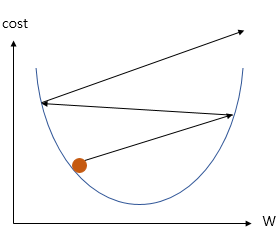

위의 그림은 학습률 $\alpha$가 지나치게 높은 값을 가질 때, 접선의 기울기가 0이 되는 $\alpha$를 찾아가는 것이 아니라 $cost$의 값이 발산하는 상황을 보여줍니다. 반대로 학습률 $\alpha$가 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적당한 $\alpha$의 값을 찾아내는 것도 중요합니다.

지금까지는 $b$는 배제시키고 최적의 $W$를 찾아내는 것에만 초점을 맞추어 경사 하강법의 원리에 대해서 배웠는데, 실제 경사 하강법은 $W$와 $b$에 대해서 동시에 경사 하강법을 수행하면서 최적의 $W$와 $b$의 값을 찾아갑니다.

+ **가설, 비용 함수, 옵티마이저는 머신 러닝 분야에서 사용되는 포괄적 개념입니다. 풀고자하는 각 문제에 따라 가설, 비용 함수, 옵티마이저는 전부 다를 수 있으며 선형 회귀에 가장 적합한 비용 함수는 평균 제곱 오차, 옵티마이저는 경사 하강법입니다.**

이제 가설, 비용 함수, 옵티마이저에 대해서 학습하였으니 파이토치로 구현해보겠습니다.

# 5. 파이토치로 선형 회귀 구현하기

---

우선 실습을 위해 파이토치의 도구들을 임포트하는 기본 셋팅을 진행합니다.

## 1) 기본 셋팅

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

실습을 위한 기본적인 셋팅이 끝났습니다. 이제 훈련 데이터인 x_train과 y_train을 선언합니다.

## 2) 변수 선언

In [7]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

x_train과 x_train의 크기(shape)를 출력해보겠습니다.

In [8]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


x_train의 값이 출력되고, x_train의 크기가 (3 × 1)임을 알 수 있습니다.
y_train과 y_train의 크기(shape)를 출력해보겠습니다.

In [9]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


y_train의 값이 출력되고, y_train의 크기가 (3 × 1)임을 알 수 있습니다.

## 3) 가중치와 편향의 초기화

선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일입니다.  
그리고 가장 잘 맞는 직선을 정의하는 것은 바로 $W$와 $b$입니다.  
선형 회귀의 목표는 가장 잘 맞는 직선을 정의하는 $W$와 $b$의 값을 찾는 것입니다.  

우선 가중치 $W$를 0으로 초기화하고, 이 값을 출력해보겠습니다.

In [10]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True) 
# 가중치 W를 출력
print(W) 

tensor([0.], requires_grad=True)


가중치 $W$가 0으로 초기화되어있으므로 0이 출력된 것을 확인할 수 있습니다. 위에서 requires_grad=True가 인자로 주어진 것을 확인할 수 있습니다. 이는 이 변수는 학습을 통해 계속 값이 변경되는 변수임을 의미합니다.

마찬가지로 편향 $b$도 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시합니다.

In [11]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


현재 가중치 $W$와 $b$ 둘 다 0이므로 현 직선의 방정식은 다음과 같습니다.

$y = 0 × x + 0$

지금 상태에선 $x$에 어떤 값이 들어가도 가설은 0을 예측하게 됩니다. 즉, 아직 적절한 $W$와 $b$의 값이 아닙니다.

## 4) 가설 세우기

파이토치 코드 상으로 직선의 방정식에 해당되는 가설을 선언합니다.

$H(x)= Wx+b$

In [12]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## 5) 비용 함수 선언하기

파이토치 코드 상으로 선형 회귀의 비용 함수에 해당되는 평균 제곱 오차를 선언합니다.

$$
cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2
$$

In [13]:
# 앞서 배운 torch.mean으로 평균을 구한다.
cost = torch.mean((hypothesis - y_train) ** 2) 
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


## 6) 경사 하강법 구현하기

이제 경사 하강법을 구현합니다. 아래의 'SGD'는 경사 하강법의 일종입니다. lr은 학습률(learning rate)를 의미합니다.
학습 대상인 W와 b가 SGD의 입력이 됩니다.

In [14]:
optimizer = optim.SGD([W, b], lr=0.01)

optimizer.zero_grad()를 실행하므로서 미분을 통해 얻은 기울기를 0으로 초기화합니다. 기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있습니다. 그 다음 cost.backward() 함수를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산됩니다. 그 다음 경사 하강법 최적화 함수 opimizer의 .step() 함수를 호출하여 인수로 들어갔던 W와 b에서 리턴되는 변수들의 기울기에 학습률(learining rate) 0.01을 곱하여 빼줌으로서 업데이트합니다.

In [15]:
# gradient를 0으로 초기화
optimizer.zero_grad() 

# 비용 함수를 미분하여 gradient 계산
cost.backward() 

# W와 b를 업데이트
optimizer.step() 

+ **requires_grad=True와 backward()에 대한 정리는 자동 미분(Autograd) 챕터에 별도 정리하였습니다.**

## 7) 전체 코드

In [17]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))


Epoch    0/2000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008

결과적으로 훈련 과정에서 $W$와 $b$는 훈련 데이터와 잘 맞는 직선을 표현하기 위한 적절한 값으로 변화해갑니다.

**에포크(Epoch)** 는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말합니다.
이번 실습의 경우 2,000번을 수행했습니다.

최종 훈련 결과를 보면 최적의 기울기 $W$는 2에 가깝고, $b$는 0에 가까운 것을 볼 수 있습니다.
현재 훈련 데이터가 x_train은 [[1], [2], [3]]이고 y_train은 [[2], [4], [6]]인 것을 감안하면
실제 정답은 $W$가 2이고, $b$가 0인 $H(x) = 2x$이므로 거의 정답을 찾은 셈입니다.

# 6. optimizer.zero_grad()가 필요한 이유

---

파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있습니다. 예를 들어봅시다.

In [18]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))


수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


계속해서 미분값인 2가 누적되는 것을 볼 수 있습니다. 그렇기 때문에 optimizer.zero_grad()를 통해 미분값을 계속 0으로 초기화시켜줘야 합니다.

# 7. torch.manual_seed()를 하는 이유

---

torch.manual_seed()를 사용한 프로그램의 결과는 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있습니다. 그 이유는 torch.manual_seed()는 난수 발생 순서와 값을 동일하게 보장해준다는 특징때문입니다. 우선 랜덤 시드가 3일 때 두 번 난수를 발생시켜보고, 다른 랜덤 시드를 사용한 후에 다시 랜덤 시드를 3을 사용한다면 난수 발생값이 동일하게 나오는지 보겠습니다.

In [19]:
import torch

torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


랜덤 시드가 3일때 두 개의 난수를 발생시켰더니 0.0043과 0.1056이 나옵니다. 이제 랜덤 시드값을 바꿔봅시다.

In [20]:
torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


0.8303과 0.1261이 나옵니다. 이제 다시 랜덤 시드값을 3으로 돌려보겠습니다. 이렇게 하면 프로그램을 다시 처음부터 실행한 것처럼 난수 발생 순서가 초기화됩니다.

In [21]:
torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


다시 동일하게 0.0043과 0.1056이 나옵니다.

+ 텐서에는 requires_grad라는 속성이 있습니다. 이것을 True로 설정하면 자동 미분 기능이 적용됩니다. 선형 회귀부터 신경망과 같은 복잡한 구조에서 파라미터들이 모두 이 기능이 적용됩니다. requires_grad = True가 적용된 텐서에 연산을 하면, 계산 그래프가 생성되며 backward 함수를 호출하면 그래프로부터 자동으로 미분이 계산됩니다.